In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
data = pd.read_csv ('C:/Users\dmitr\Desktop\AI_2020\Telecom-Churn-Data-Analysis-master\Telecom-Churn-Data-Analysis-master\Telecom Churn.csv')

In [5]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Univariate Viz

### Histogram

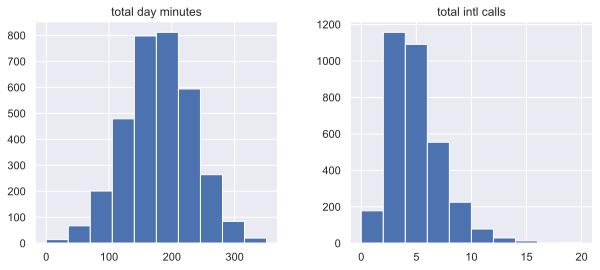

In [6]:
features = ['total day minutes', 'total intl calls']
data[features].hist(figsize=(10, 4));

<Axes: >

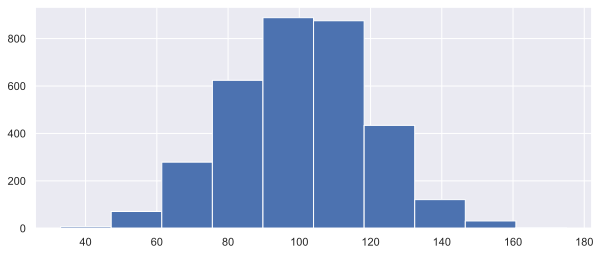

In [7]:
data['total night calls'].hist(figsize=(10,4))

### Density Plots
#### They Do not depend on the bin size to plot as in the case of histograms

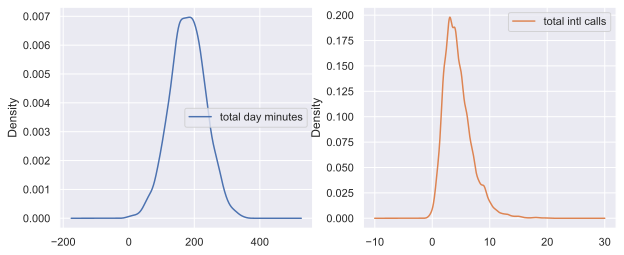

In [8]:
data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

C:\Users\dmitr\AppData\Local\Temp\ipykernel_16332\1156229402.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total intl calls']);


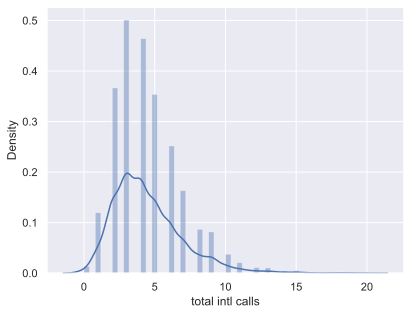

In [9]:
sns.distplot(data['total intl calls']);
# The bar graphs here indicate the density rather than the total values

### Boxplot

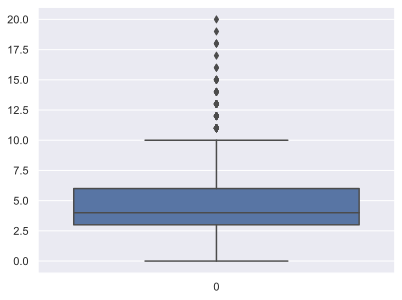

In [10]:
sns.boxplot(data=data['total intl calls']);

### Voilin Plot

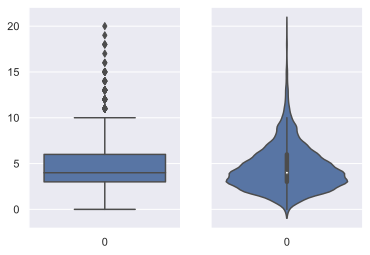

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data['total intl calls'], ax=axes[0]);
sns.violinplot(data=data['total intl calls'], ax=axes[1]);

### Bar Graph

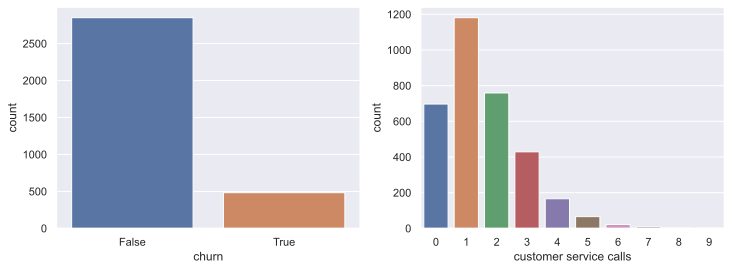

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=data, ax=axes[0]);
sns.countplot(x='customer service calls', data=data, ax=axes[1]);

## Multivariate Viz

#### Qiantitative-Quantitative

### Correlation Matrix

C:\Users\dmitr\AppData\Local\Temp\ipykernel_16332\2688010577.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[numerical].corr()
C:\Users\dmitr\AppData\Local\Temp\ipykernel_16332\2688010577.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


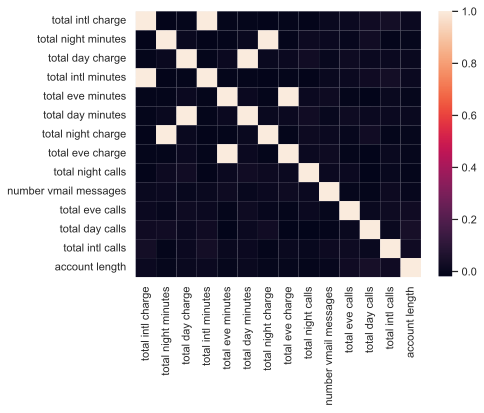

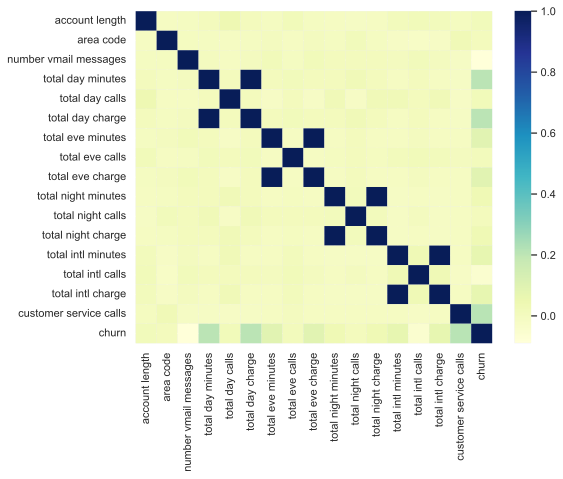

In [13]:
# Drop non-numerical variables
numerical = list(set(data.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);


corr = data.corr()
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr, cmap="YlGnBu")

In [14]:
# Getting rid of the variables which are not contributing as they have been directly calculted using other variables
numerical = list(set(numerical) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

C:\Users\dmitr\AppData\Local\Temp\ipykernel_16332\2801474893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = data[numerical].corr()


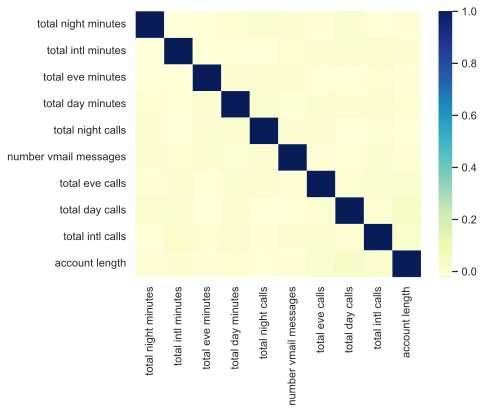

In [15]:
corr_matrix2 = data[numerical].corr()
sns.heatmap(corr_matrix2,  cmap="YlGnBu");

### Scatterplot

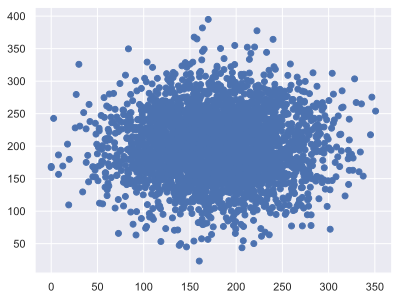

In [16]:
plt.scatter(data['total day minutes'], data['total night minutes']);

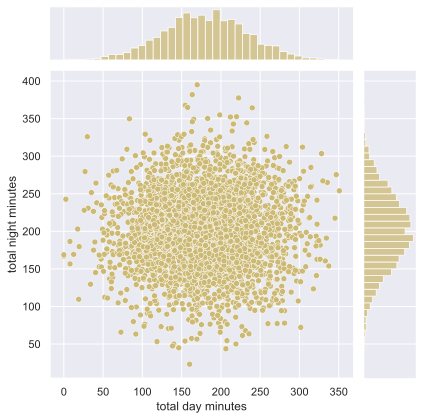

In [17]:
#scatterplot with BAR Graph for distribution
sns.jointplot(x='total day minutes', y='total night minutes', data=data, kind='scatter', color="y");

In [18]:
# Smoothed Version
sns.jointplot('total day minutes', 'total night minutes', data=data, kind="kde", color="r");

TypeError: jointplot() got multiple values for argument 'data'

### Scatterplot matrix

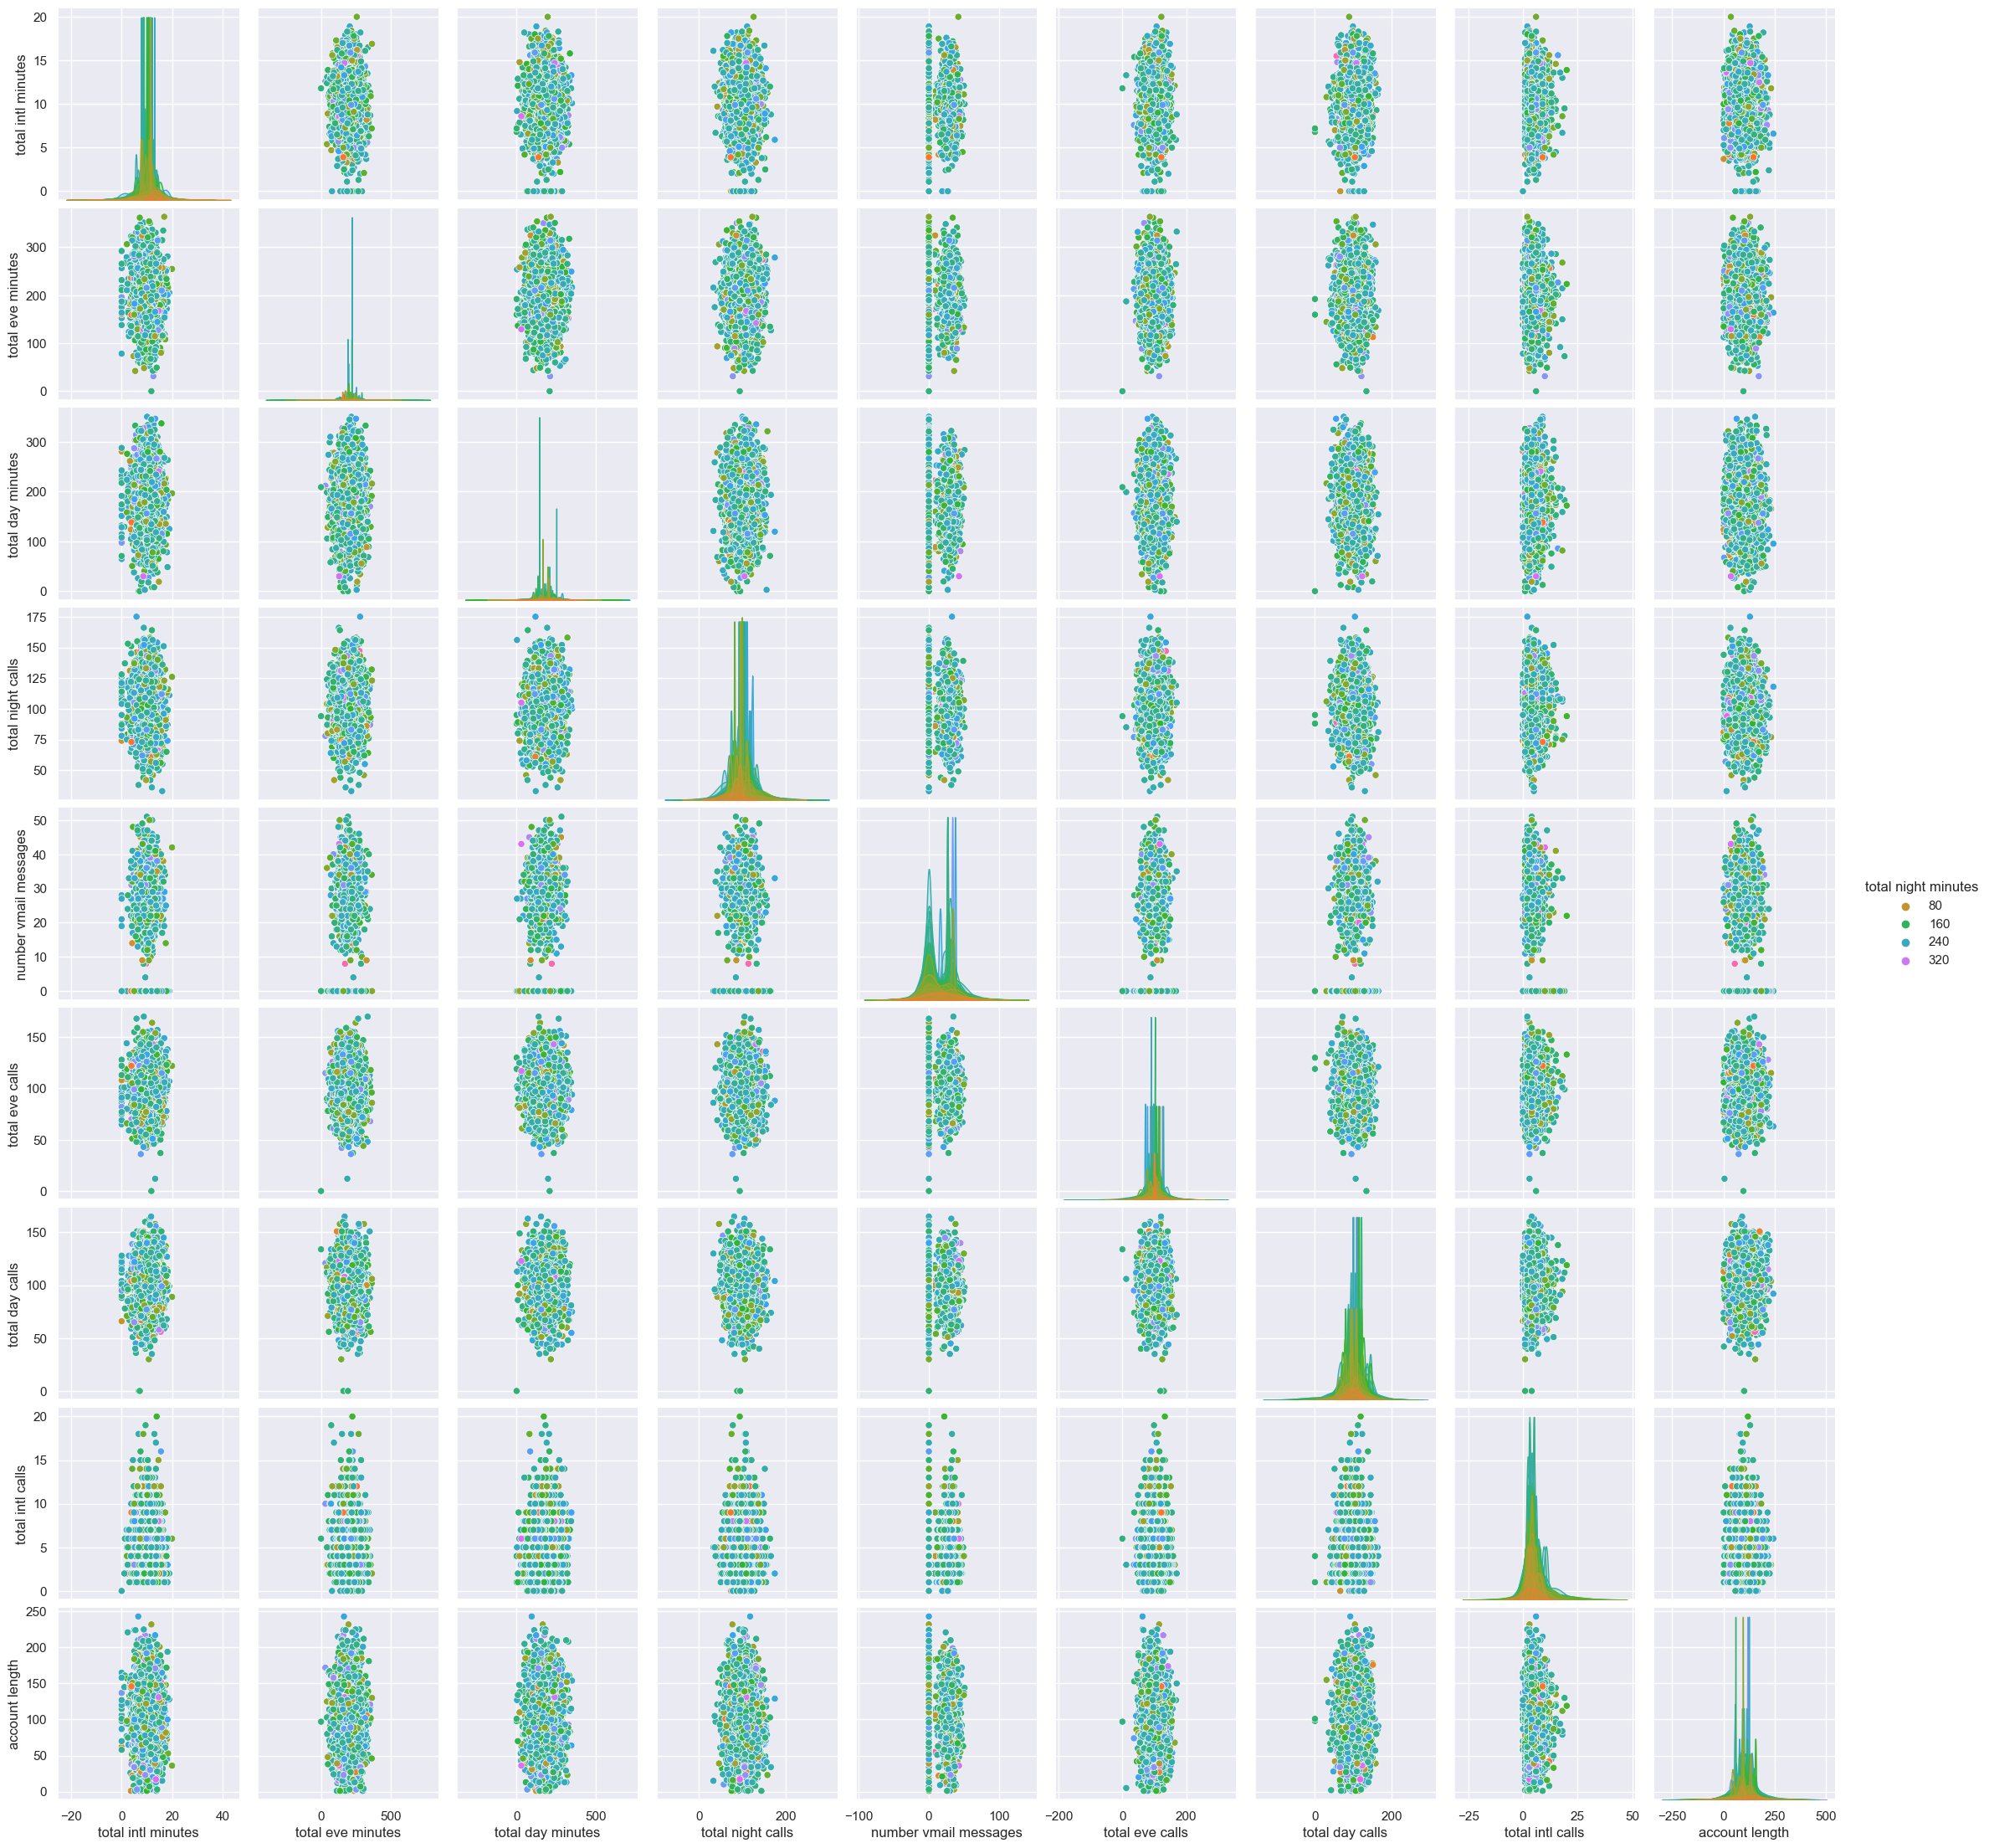

In [19]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[numerical], hue="total night minutes", palette="husl");

In [20]:
%config InlineBackend.figure_format = 'svg'

#### Quantitative-Categorical

In [21]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False);

NameError: name 'df' is not defined

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

In [ ]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=df[df['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

In [ ]:
sns.countplot(x='customer service calls', hue='churn', data=df);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScal

In [ ]:
X = df.drop(['churn', 'state'], axis=1)
X['international plan'] = X['international plan'].map({'Yes': 1, 'No': 0})
X['voice mail plan'] = X['voice mail plan'].map({'Yes': 1, 'No': 0})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);